In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [2]:
import FinanceDataReader as fdr

apple = fdr.DataReader('AAPL', '2010')
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515211,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422666,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800
...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400


# 전략
## 단기이동평균선 > 장기이동평균선 : 매수
## 단기이동평균선 < 장기이동평균선 : 매도

<AxesSubplot:xlabel='Date'>

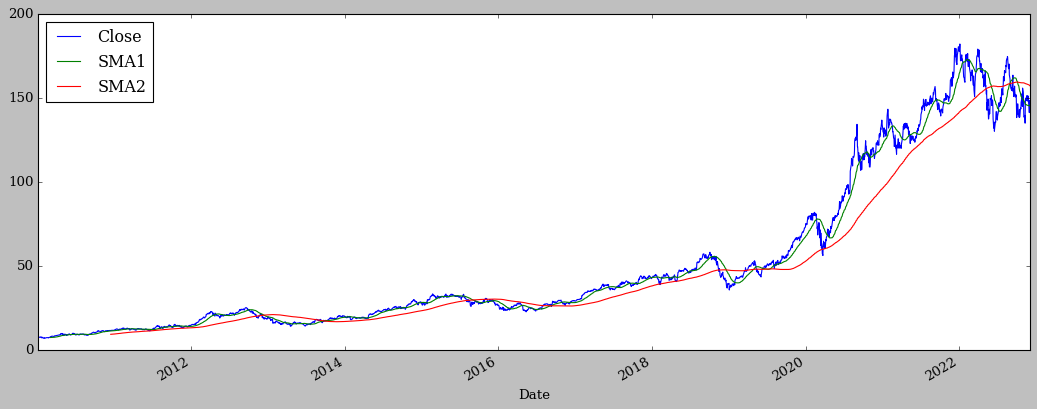

In [3]:
# 단기 이동평균선(42) 과 장기 이동평균선 계산(252)

SMA1 = 42
SMA2 = 242

# 이동평균선 계산
apple['SMA1'] = apple['Close'].rolling(SMA1).mean()
apple['SMA2'] = apple['Close'].rolling(SMA2).mean()

# 시각화
apple = apple[['Close', 'SMA1', 'SMA2']]
apple.plot(figsize=(16,6))

In [4]:
apple.dropna(inplace=True)

apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)
apple

C:\Users\an373\AppData\Local\Temp\ipykernel_6096\2011923027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_6096\2011923027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)


,Close,SMA1,SMA2,Position
Date,,,,
2010-12-16,11.473214,11.179039,9.185782,1
2010-12-17,11.450357,11.188495,9.201514,1
2010-12-20,11.507500,11.198427,9.217428,1
2010-12-21,11.578571,11.210910,9.234138,1
2010-12-22,11.612857,11.225952,9.251048,1
...,...,...,...,...
2022-11-28,144.220001,145.225475,157.608223,-1
2022-11-29,141.169998,145.194285,157.465372,-1
2022-11-30,148.029999,145.428332,157.356694,-1


(-1.2, 1.2)

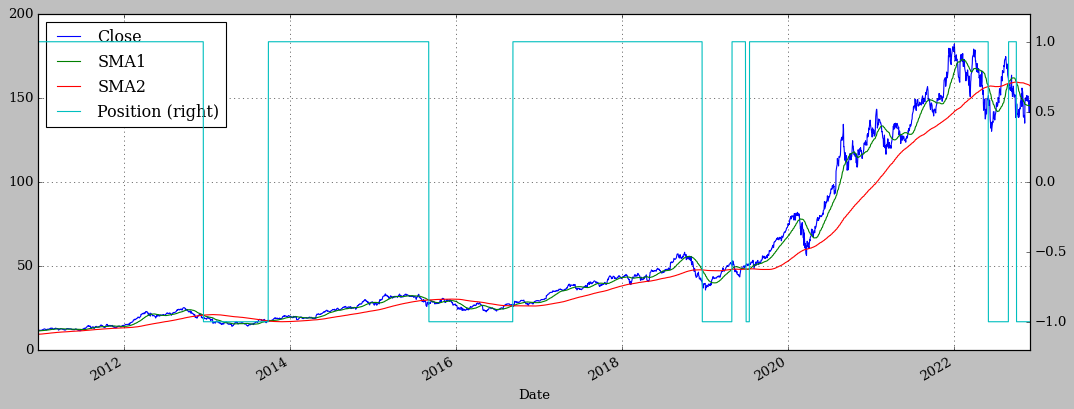

In [5]:
ax = apple.plot(secondary_y = 'Position', figsize=(16,6), grid=True)
plt.ylim(-1.2,1.2)

# 백테스팅

In [6]:
apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']

C:\Users\an373\AppData\Local\Temp\ipykernel_6096\1913815698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Returns'] = np.log(apple['Close'] / apple['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_6096\1913815698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Strategy'] = apple['Position'].shift(1) * apple['Returns']


In [7]:
# 수익률 계산
np.exp(apple[['Returns', 'Strategy']].sum())

Returns     12.883051
Strategy     7.711229
dtype: float64

In [8]:
# 변동성 계산
apple[['Returns', 'Strategy']].std() *252 **0.5

Returns     0.288487
Strategy    0.288601
dtype: float64

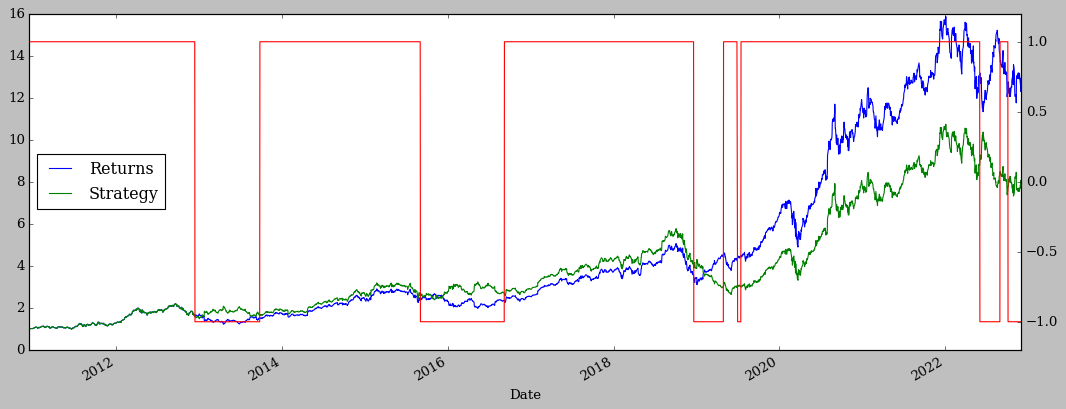

In [9]:
ax = apple[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,6))
apple['Position'].plot(ax=ax, secondary_y='Position', lw=1, color='r')
plt.ylim(-1.2,1.2)
ax.legend(loc='center left')

In [10]:
# 최적화
from itertools import product

sma1 = range(20,61,4)
sma2 = range(180, 281, 10)

results = pd.DataFrame()

apple = fdr.DataReader('AAPL', '2010')
for SMA1, SMA2 in product(sma1, sma2) :
    data = apple[['Close']]
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns'] 
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame({
        'SMA1' : SMA1,
        'SMA2' : SMA2,
        'MARKET' : perf['Returns'],
        'STRATEGY' : perf['Strategy'],
        'OUT' : perf['Strategy'] - perf['Returns']
    }, index=[0]), ignore_index=True)

results

C:\Users\an373\AppData\Local\Temp\ipykernel_6096\3021967380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_6096\3021967380.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
C:\Users\an373\AppData\Local\Temp\ipykernel_6096\3021967380.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,14.612435,4.888305,-9.724130
1,20,190,14.853143,5.398006,-9.455137
2,20,200,13.014717,6.951944,-6.062772
3,20,210,13.606023,8.167575,-5.438448
4,20,220,13.479286,8.592486,-4.886800
...,...,...,...,...,...
116,60,240,12.921664,7.714610,-5.207054
117,60,250,12.723047,7.136282,-5.586765
118,60,260,12.016375,6.764511,-5.251864
119,60,270,12.058739,5.689976,-6.368763


In [11]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
101,56,200,13.014717,13.371647,0.356930
111,60,190,14.853143,14.141100,-0.712043
112,60,200,13.014717,11.349533,-1.665184
56,40,190,14.853143,12.710946,-2.142197
110,60,180,14.612435,12.338561,-2.273874
100,56,190,14.853143,12.227025,-2.626118
91,52,210,13.606023,10.960606,-2.645418


# 전략
# 1일과 2일전 데이터로 오늘의 데이터를 예측하는 선형회귀

In [12]:
apple = fdr.DataReader('AAPL', '2010')[['Close']]

apple['returns'] = np.log(apple / apple.shift(1))
apple.dropna(inplace=True)
apple['direction'] = np.sign(apple['returns']).astype(int)

<AxesSubplot:>

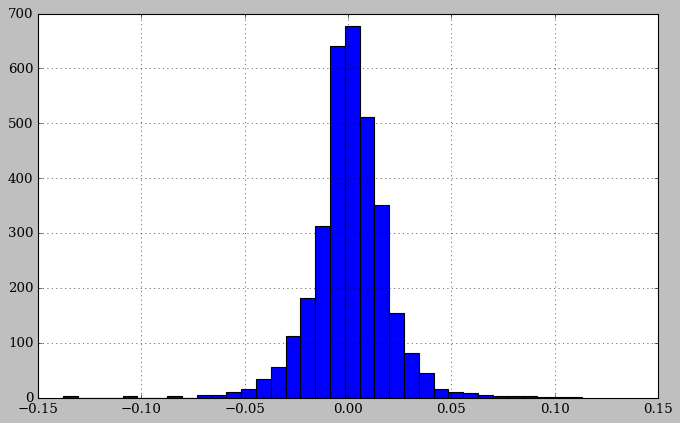

In [13]:
apple['returns'].hist(bins=35, figsize=(10,6))

In [14]:
def create_lags(data, lags) :
    global cols
    cols = []
    for lag in range(1, lags+1) :
        col = f'lag_{lag}'
        data[col] = data['returns'].shift(lag)
        cols.append(col)
        
create_lags(apple, 2)
apple

,Close,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,7.656429,0.001727,1,NaN,NaN
2010-01-06,7.534643,-0.016034,-1,0.001727,NaN
2010-01-07,7.520714,-0.001850,-1,-0.016034,0.001727
2010-01-08,7.570714,0.006626,1,-0.001850,-0.016034
2010-01-11,7.503929,-0.008861,-1,0.006626,-0.001850
...,...,...,...,...,...
2022-11-28,144.220001,-0.026615,-1,-0.019788,0.005909
2022-11-29,141.169998,-0.021375,-1,-0.026615,-0.019788
2022-11-30,148.029999,0.047450,1,-0.021375,-0.026615


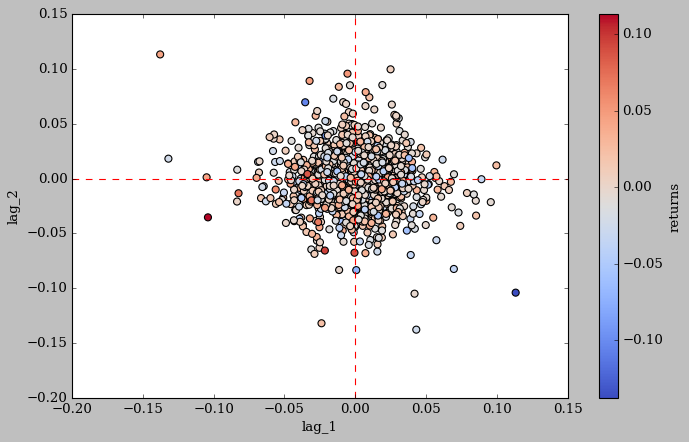

In [15]:
apple.dropna(inplace=True)
apple.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10,6), colorbar=True, s=40)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# pos_ols_1 은 종속변수를 수익률에 두고 학습
# pos_ols_2 은 종속변수를 상승 or 하락에 두고 학습

X_train = apple[cols][:'2020']
X_test = apple[cols]['2021':]
y_returns_train = apple['returns'][:'2020']
y_direction_train = apple['direction'][:'2020']

In [17]:

data = pd.DataFrame()
data.index = apple['2021':].index
data['returns'] = apple['returns']['2021':]
data['direction'] = apple['direction']['2021':]

data['pos_returns'] = lr.fit(X_train, y_returns_train).predict(X_test)
data['pos_direction'] = lr.fit(X_train, y_direction_train).predict(X_test)


In [18]:
data[['pos_returns', 'pos_direction']] = np.where(data[['pos_returns', 'pos_direction']] > 0, 1, -1)

In [19]:
data['pos_returns'].value_counts()

 1    412
-1     72
Name: pos_returns, dtype: int64

In [20]:
data['pos_direction'].value_counts()

 1    435
-1     49
Name: pos_direction, dtype: int64

In [21]:
# 다수의 매수매도
(data['pos_returns'].diff() != 0).sum()

133

In [22]:
(data['pos_direction'].diff() != 0).sum()

95

# 백테스팅

In [23]:
data['start_returns'] = data['pos_returns'] * data['returns']
data['start_direction'] = data['pos_direction'] * data['returns']

data[['returns', 'start_returns', 'start_direction']].sum().apply(np.exp)

returns            1.113950
start_returns      1.310962
start_direction    1.308190
dtype: float64

In [24]:
# 예측의 정확도
(data['direction'] == data['pos_returns']).value_counts()

True     248
False    236
dtype: int64

In [25]:
(data['direction'] == data['pos_direction']).value_counts()

True     243
False    241
dtype: int64

<AxesSubplot:xlabel='Date'>

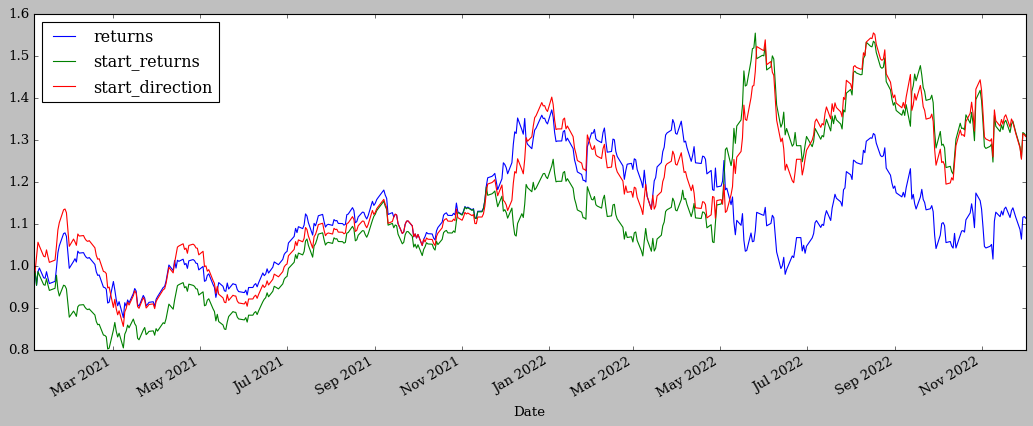

In [26]:
data[['returns', 'start_returns', 'start_direction']].cumsum().apply(np.exp).plot(figsize=(16,6))

# clustering 

## 전략 : 하루와 이틀전의 주가를 거리기반으로 2개의 그룹으로 분류한다.

In [73]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)

model.fit(apple[cols])

KMeans(n_clusters=2, random_state=0)

In [74]:
apple['pos_clus'] = model.predict(apple[cols])

In [75]:
apple['pos_clus'] = np.where(apple['pos_clus'] == 1, 1, -1)

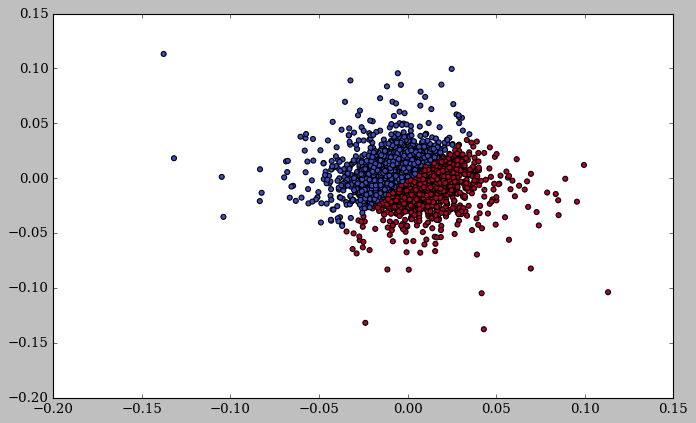

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(apple['lag_1'], apple['lag_2'], c=apple['pos_clus'], cmap='coolwarm')

In [77]:
apple['strat_clus'] = apple['pos_clus'] * apple['returns']

In [78]:
apple[['returns', 'strat_clus']].sum().apply(np.exp)

returns       19.617386
strat_clus     2.420483
dtype: float64

# Frequentist

## 전략 : 하루와 어제의 주가의 오름과 내림에 따라 경우의 수를 분리하여

In [51]:
def create_bins(data, bins=[0]) :
    global cols_bin
    cols_bin = []
    for col in cols :
        col_bin = col + '_bin'
        # 0 을 기준으로 아래는 0, 위는 1로 매핑시킨다.
        # 구간을 2개로 나눌 경우는 np.where 와 같다.
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)
        
create_bins(apple)

In [55]:
apple[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-07,0,1,-1
2010-01-08,0,0,1
2010-01-11,1,0,-1
2010-01-12,0,1,-1
2010-01-13,0,0,1


In [56]:
grouped = apple.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           321
                       1           397
           1          -1           397
                       0             2
                       1           417
1          0          -1           401
                       0             2
                       1           413
           1          -1           415
                       0             1
                       1           484
dtype: int64

In [82]:
res = grouped['direction'].size().unstack(fill_value=0)

In [88]:
def highlight_max(s) :
    is_max = s == s.max()
    return ['background-color : green' if v else '' for v in is_max]

res.style.apply(highlight_max, axis=1)

In [90]:
apple['pos_freq'] = np.where(apple[cols_bin].sum(axis=1) == 2, -1, 1)

In [91]:
(apple['direction'] == apple['pos_freq']).value_counts()

True     1642
False    1608
dtype: int64

In [92]:
apple['strat_freq'] = apple['pos_freq'] * apple['returns']

In [93]:
apple[['returns', 'strat_freq']].sum().apply(np.exp)

returns       19.617386
strat_freq     1.575751
dtype: float64

<AxesSubplot:xlabel='Date'>

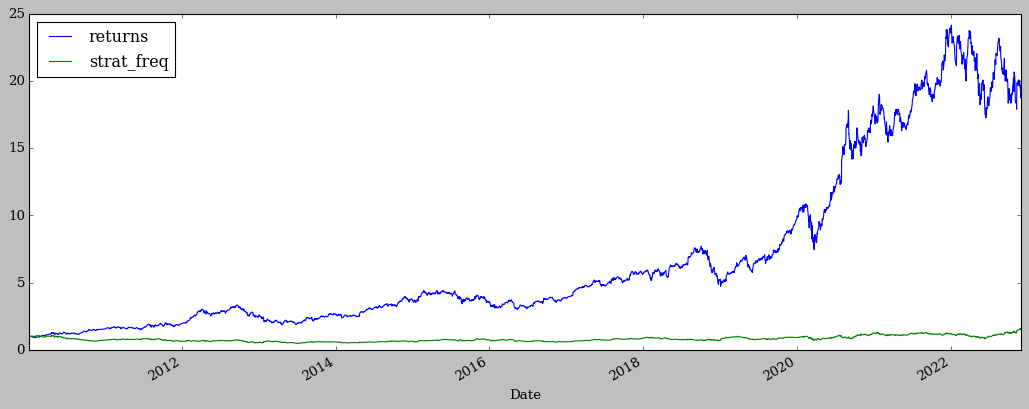

In [102]:
apple[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(16,6))